# 기본 모듈

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')


# seaborn 에서 제공하는 그래프 테마
# sns.set_style('ticks')
# sns.set_style('darkgrid')
# sns.set_style('whitegrid')

# 그래프를 그리기 위한 기본 설정
# 폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 - 기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 맛집 데이터 불러오기

In [26]:
# 데이터를 읽어온다
matzip = pd.read_csv('data2/matzipData.csv')
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,일
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,일
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


# 맛집 데이터 처리

In [27]:
# 정보 확인
matzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  400 non-null    object
 1   Rating           400 non-null    object
 2   Address          400 non-null    object
 3   Tel              350 non-null    object
 4   Food             400 non-null    object
 5   Price            397 non-null    object
 6   Parking          329 non-null    object
 7   Operating Time   364 non-null    object
 8   Holiday          126 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [28]:
# 결측치 확인
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

# 결측치 처리






## 휴일에 대한 결측치 처리

In [29]:
# 휴일 구조 파악
matzip['Holiday'].value_counts()

일                     75
월                     21
토, 일                   7
화                      3
월, 화                   2
일, 첫째 월                2
일, 월                   2
수                      2
둘째/넷째 일                2
첫째/셋째 일                1
토                      1
월, 셋째 화                1
월, 일                   1
첫째, 셋째 월, 둘째, 넷째 일     1
월, 마지막 화               1
토-일                    1
넷째 일, 월                1
둘째, 넷째 일               1
격주 월                   1
Name: Holiday, dtype: int64

In [30]:
# 휴일의 결측치는 연중무휴로 채워준다.
matzip['Holiday'].fillna('연중무휴', inplace = True)
matzip.isna().sum()

Restaurant Name     0
Rating              0
Address             0
Tel                50
Food                0
Price               3
Parking            71
Operating Time     36
Holiday             0
dtype: int64

In [31]:
matzip['Holiday'].value_counts()

연중무휴                  274
일                      75
월                      21
토, 일                    7
화                       3
둘째/넷째 일                 2
수                       2
월, 화                    2
일, 월                    2
일, 첫째 월                 2
둘째, 넷째 일                1
넷째 일, 월                 1
토-일                     1
격주 월                    1
첫째, 셋째 월, 둘째, 넷째 일      1
월, 셋째 화                 1
첫째/셋째 일                 1
토                       1
월, 마지막 화                1
월, 일                    1
Name: Holiday, dtype: int64

## 가격에 대한 결측치 처리와 변환

In [32]:
# 가격 데이터 확인
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [33]:
# 결측치 확인
matzip['Price'].isna().sum()

3

In [34]:
# 결측치는 10000으로 채워준다
# 그리고 가격을 숫자 값으로 변환. 가장 작은 값을 10000으로 설정. 
matzip['Price'].fillna('10000', inplace = True)
matzip['Price'].isna().sum()

0

In [35]:
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
10000        3
Name: Price, dtype: int64

In [39]:
# 값을 변경한다
# 만원이라는 글자를 10000으로 변경한다.
matzip['Price'] = matzip['Price'].str.replace('만원', '10000')
# 210000 to 20000
matzip['Price'] = matzip['Price'].str.replace('210000', '20000')
# 310000 to 30000
matzip['Price'] = matzip['Price'].str.replace('310000', '30000')
# 410000 to 40000
matzip['Price'] = matzip['Price'].str.replace('410000', '40000')
# 10000-, 20000-, 30000- to Null
matzip['Price'] = matzip['Price'].str.replace('10000-', '')
matzip['Price'] = matzip['Price'].str.replace('20000-', '')
matzip['Price'] = matzip['Price'].str.replace('30000-', '')
# 공백을 포함한 미만, 이상을 공백으로 바꿔준다
matzip['Price'] = matzip['Price'].str.replace(' 미만', '')
matzip['Price'] = matzip['Price'].str.replace(' 이상', '')

matzip['Price'].value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [40]:
# 변경 후 값의 타입을 확인한다
matzip['Price'].dtype

dtype('O')

In [41]:
# 숫자로 변경한다
matzip['Price'] = matzip['Price'].astype('int64')
matzip['Price'].dtype

dtype('int64')

## 평점

In [42]:
# 평점에 저장되어 있는 데이터 확인
matzip['Rating'].value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.4      4
3.6      4
4.7      3
3.8      2
2.7      1
3.2      1
3.1      1
Name: Rating, dtype: int64

In [43]:
# 결측치 확인
matzip['Rating'].isna().sum()

0

In [44]:
# -를 0.0으로 변경한다
matzip['Rating'] = matzip['Rating'].str.replace('-', '0.0')
matzip['Rating'].value_counts()

0.0    155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
3.3      5
4.6      5
3.6      4
3.4      4
4.7      3
3.8      2
3.2      1
2.7      1
3.1      1
Name: Rating, dtype: int64

In [45]:
# 값의 타입을 확인한다
matzip['Rating'].dtype

dtype('O')

In [46]:
# 실수로 변환한다
matzip['Rating'] = matzip['Rating'].astype('float64')
matzip['Rating'].dtype

dtype('float64')

## 전화번호

In [49]:
# 결측치 확인
matzip['Tel'].isna().sum()

0

In [50]:
matzip['Tel'].fillna('번호없음', inplace = True)
matzip['Tel'].isna().sum()

0

## 주차공간

In [51]:
matzip['Parking'].isna().sum()

71

In [53]:
# 주차공간에 저장되어 있는 값들을 확인한다
matzip['Parking'].value_counts()

주차공간없음                199
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 1시간 무료          1
유료주차 가능 주차권 2시간 제공      1
유료주차 가능 1.5시간 무료        1
무료주차 가능 당일 무료           1
Name: Parking, dtype: int64

In [54]:
# 결측치를 주차공간없음으로 채워준다
matzip['Parking'].fillna('주차공간없음', inplace = True)
matzip['Parking'].isna().sum()

0

In [55]:
matzip['Parking'].value_counts()

주차공간없음                270
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 1시간 무료          1
유료주차 가능 주차권 2시간 제공      1
유료주차 가능 1.5시간 무료        1
무료주차 가능 당일 무료           1
Name: Parking, dtype: int64

## 영업 시간

In [56]:
# 결측치 확인
matzip['Operating Time'].isna().sum()

36

In [57]:
# 저장되어 있는 값 확인
matzip['Operating Time'].value_counts()

11:00 - 22:00                            25
11:30 - 22:00                            15
11:30 - 21:30                            15
00:00 - 24:00                            12
11:00 - 21:00                            11
                                         ..
월-금: 08:00 - 21:00 토-일: 10:00 - 21:00     1
화-금: 11:30 - 21:50 토-일: 17:30 - 21:20     1
월-금: 13:00 - 01:00 토-일: 13:00 - 24:00     1
12:00 - 21:00                             1
19:00 - 03:00                             1
Name: Operating Time, Length: 204, dtype: int64

In [59]:
# 결측치를 00:00 - 24:00으로 채워준다
matzip['Operating Time'].fillna('00:00 - 24::00', inplace = True)
matzip['Operating Time'].isna().sum()

0

In [60]:
matzip.isna().sum()

Restaurant Name    0
Rating             0
Address            0
Tel                0
Food               0
Price              0
Parking            0
Operating Time     0
Holiday            0
dtype: int64

# 데이터 분석

## 가격 분포 확인

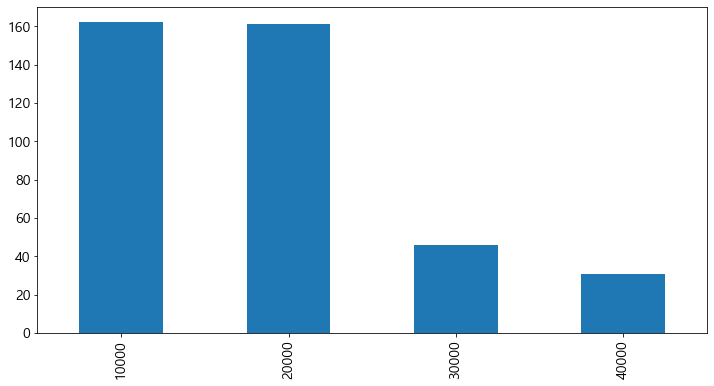

In [63]:
# 막대 그래프
# 컬럼의 값의 종류가 적을 경우(카테고리형 데이터)
# 컬럼에 저장되어 있는 값 종류별 양을 비교할 때
a1 = matzip['Price'].value_counts()

a1.plot.bar()
plt.show()

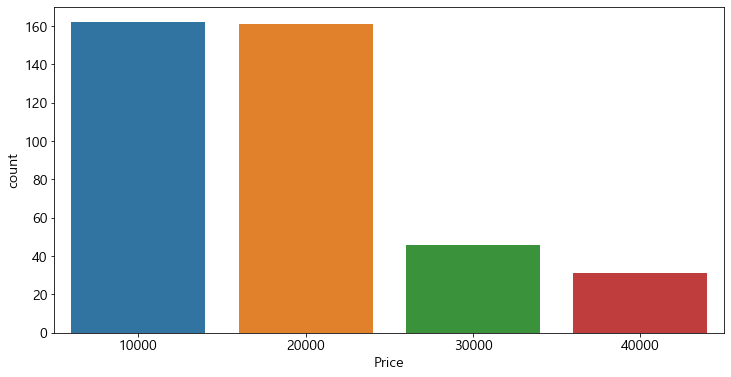

In [64]:
sns.countplot(x = 'Price', data = matzip)
plt.show()

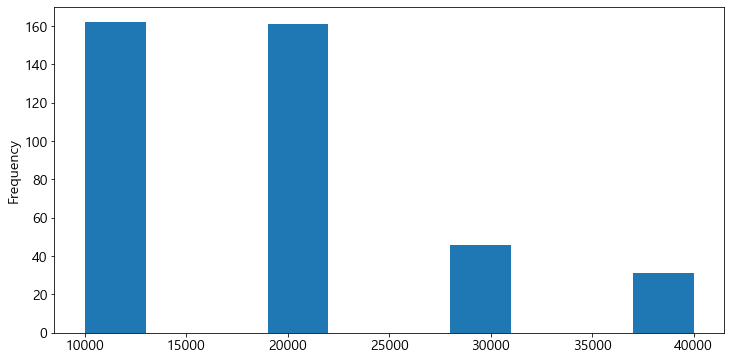

In [65]:
# 히스토그램
# 범위형 데이터의 분포를 보고자 할 때 사용한다
# 최소와 최대안에서 주어진 그룹의 개수만큼 범위를 분할하여 각 범위 안에 해당하는 데이터의 개수를 시각화한다
# 분포, 왜도, 첨도, 밀도 등 통계에서 많이 사용하는 그래프이다
matzip['Price'].plot.hist()
plt.show()

### 10000, 20000원 대가 많고 30000, 40000원대는 적다

## 주차 공간과 평점간의 관계

In [66]:
# 주차 공간의 분포를 확인한다
# 문자열 데이터를 가지고 범위를 잡아 그룹을 나누는 것 자체가 말이 되지 않기 때문에 오류가 발생한다
matzip['Parking'].plot.hist()
plt.show()

TypeError: no numeric data to plot

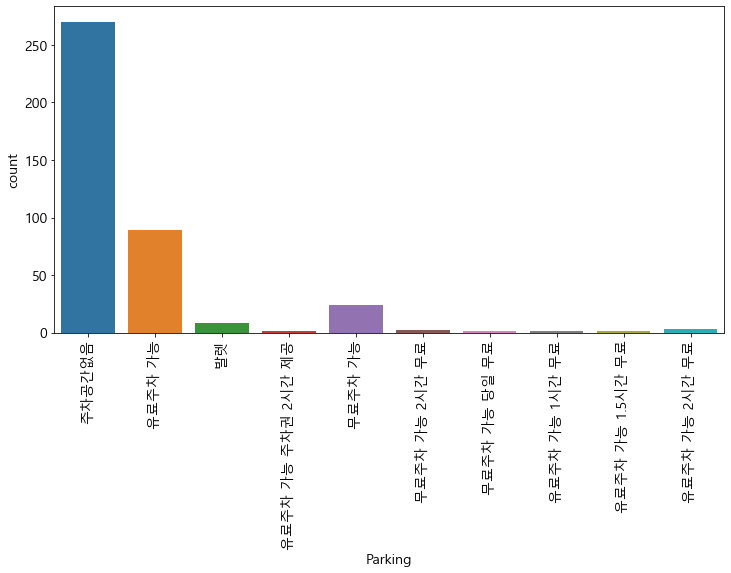

In [76]:
# 막대 그래프로 확인한다

# sns.countplot으로 출력해보니 x축 라벨이 겹친다
# sns.countplot(x = 'Parking', data = matzip)

# a1 = matzip['Parking'].value_counts()
# a1.plot.bar()

# 하지만... x축 라벨을 회전을 시켜본다면 ?!
plt.xticks(rotation = 90)
sns.countplot(x = 'Parking', data = matzip)


plt.show()

In [79]:
# Parking에 저장되어 있는 값의 목록을 출력한다.
a1 = matzip['Parking'].value_counts().index
a1

Index(['주차공간없음', '유료주차 가능', '무료주차 가능', '발렛', '유료주차 가능 2시간 무료',
       '무료주차 가능 2시간 무료', '유료주차 가능 1시간 무료', '유료주차 가능 주차권 2시간 제공',
       '유료주차 가능 1.5시간 무료', '무료주차 가능 당일 무료'],
      dtype='object')

In [80]:
# 평점이 0.0인 것은 제거한다.
idx2 = matzip.query('Rating == 0.0').index
matzip_temp = matzip.drop(idx2)
matzip_temp

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,20000,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,30000,유료주차 가능,11:30 - 21:30,연중무휴
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,40000,주차공간없음,월-토: 11:30 - 23:00 일: 17:30 - 23:00,연중무휴
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,40000,발렛,06:00 - 22:00,연중무휴
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,10000,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4.0,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,20000,주차공간없음,17:00 - 01:30,일
396,옴,4.0,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,20000,주차공간없음,11:00 - 22:00,연중무휴
397,코블러,4.0,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,20000,유료주차 가능,19:00 - 03:00,일
398,클류치,4.0,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,10000,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,연중무휴


주차공간없음 : 4.106000000000003


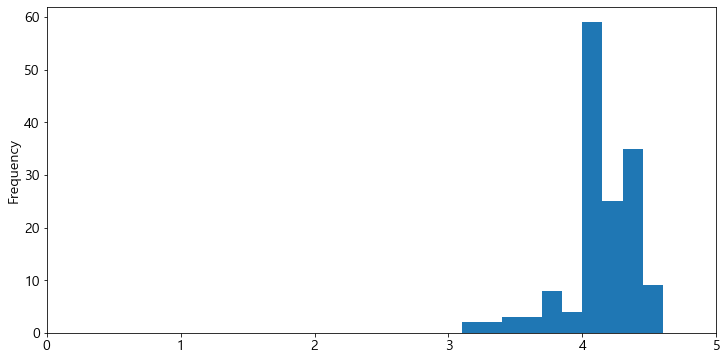

유료주차 가능 : 4.090163934426228


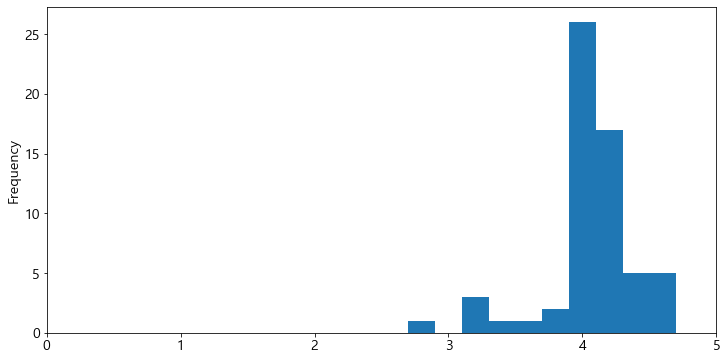

무료주차 가능 : 4.173684210526316


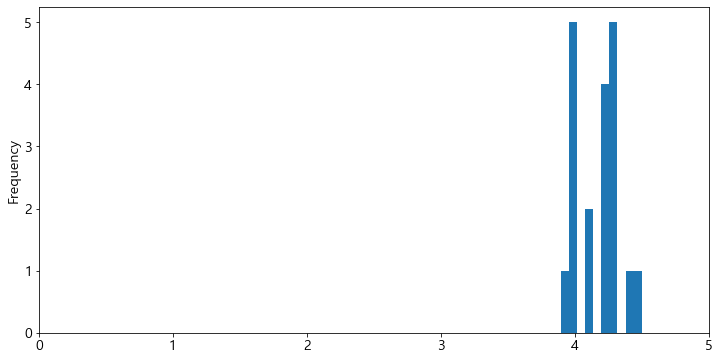

발렛 : 4.1875


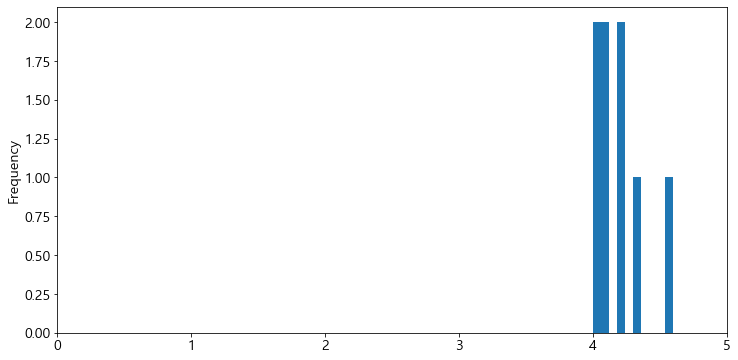

유료주차 가능 2시간 무료 : 4.066666666666666


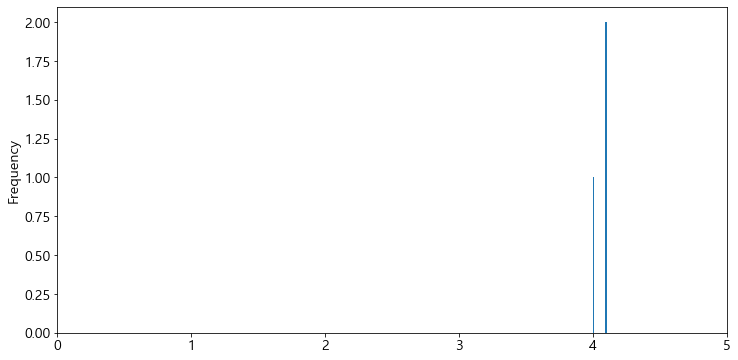

무료주차 가능 2시간 무료 : 4.7


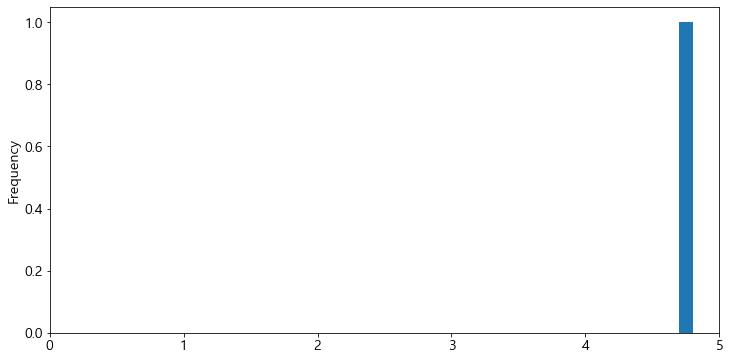

유료주차 가능 1시간 무료 : 4.4


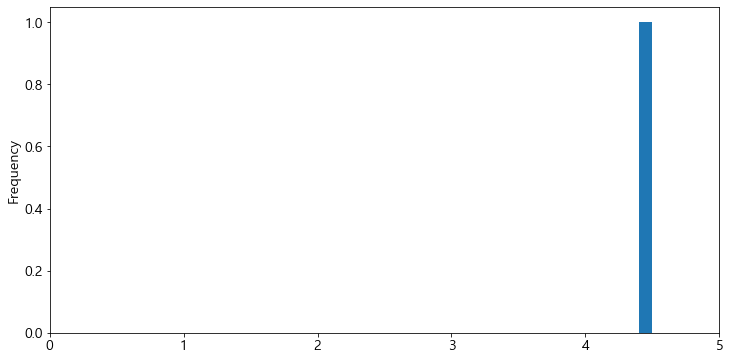

유료주차 가능 주차권 2시간 제공 : 4.1


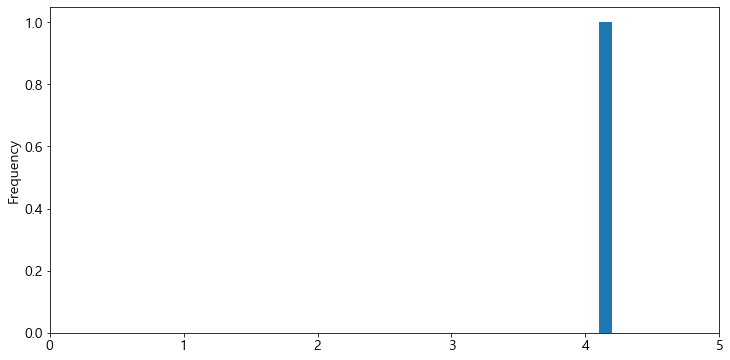

유료주차 가능 1.5시간 무료 : 4.4


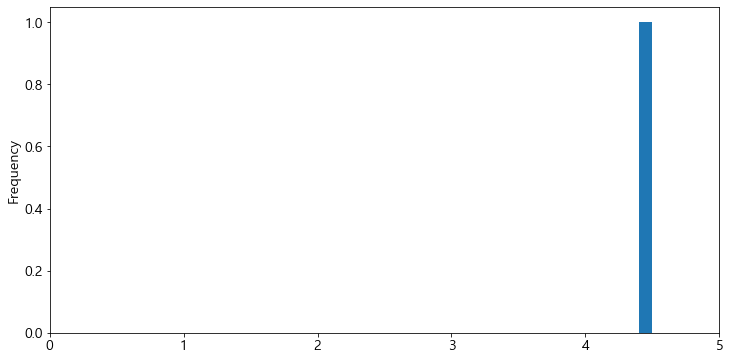

무료주차 가능 당일 무료 : nan


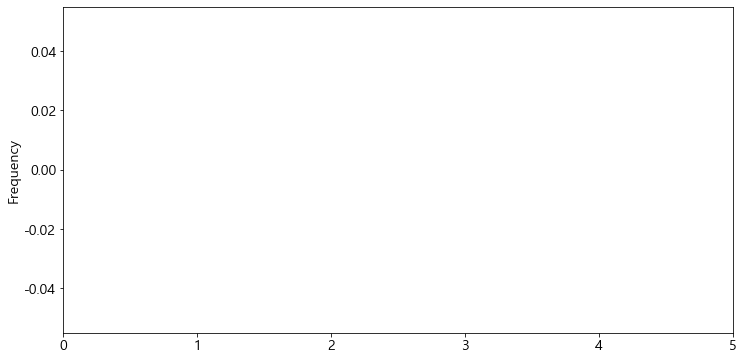

In [87]:
# Parking에 저장되어 있는 값 만큼 반복한다
for value in a1 :
    # print(value)
    # 각 값에 해당하는 로우의 인덱스를 가져온다
    idx = matzip_temp.query(f'Parking == @value').index
    # display(idx)

    # idx에 해당하는 데이터들 중 평점을 가져온다
    rating = matzip_temp.loc[idx, 'Rating']
    # display(rating)

    # 평점 평균을 구한다
    rating_mean = rating.mean()
    print(f'{value} : {rating_mean}')

    # 평점 분포를 확인한다
    rating.plot.hist()
    plt.xlim(0, 5)
    plt.show()